# Task
Analyze the "Mall Customer Segmentation Data" to segment customers using K-Means clustering, visualize the clusters using PCA or t-SNE, and propose tailored marketing strategies for each segment.

## Load the data

### Subtask:
Load the Mall Customer Segmentation Data.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first 5 rows to confirm successful loading.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Display the first 5 rows of the DataFrame
display(df.head().to_markdown(index=False, numalign='left', stralign='left'))

'| CustomerID   | Genre   | Age   | Annual Income (k$)   | Spending Score (1-100)   |\n|:-------------|:--------|:------|:---------------------|:-------------------------|\n| 1            | Male    | 19    | 15                   | 39                       |\n| 2            | Male    | 21    | 15                   | 81                       |\n| 3            | Female  | 20    | 16                   | 6                        |\n| 4            | Female  | 23    | 16                   | 77                       |\n| 5            | Female  | 31    | 17                   | 40                       |'

## Explore the data

### Subtask:
Conduct exploratory data analysis (EDA) to understand the data.


**Reasoning**:
Display the first 5 rows, column names and their data types, summary statistics of the numerical columns, and check for missing values as requested in the instructions.



In [9]:
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Prepare the data

### Subtask:
Preprocess the data for clustering.


**Reasoning**:
Select the relevant features, convert them to a NumPy array, and standardize them using StandardScaler.



In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Convert to NumPy array
X_np = X.values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

display(X_scaled[:5])

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## Apply k-means clustering

### Subtask:
Apply K-Means Clustering to segment customers.


**Reasoning**:
Determine the optimal number of clusters using the elbow method and then apply K-Means clustering with that number of clusters.



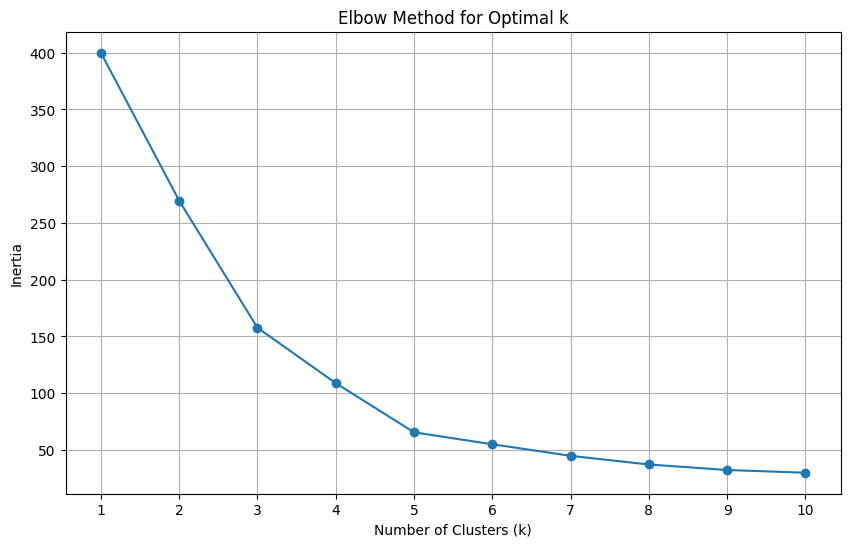

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow method, let's choose k=5
optimal_k = 5

# Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with the new cluster column
display(df.head())

## Visualize the clusters

### Subtask:
Use PCA or t-SNE to visualize the clusters.


**Reasoning**:
Apply PCA to reduce dimensionality and then plot the clusters using the results, coloring by the assigned cluster labels.



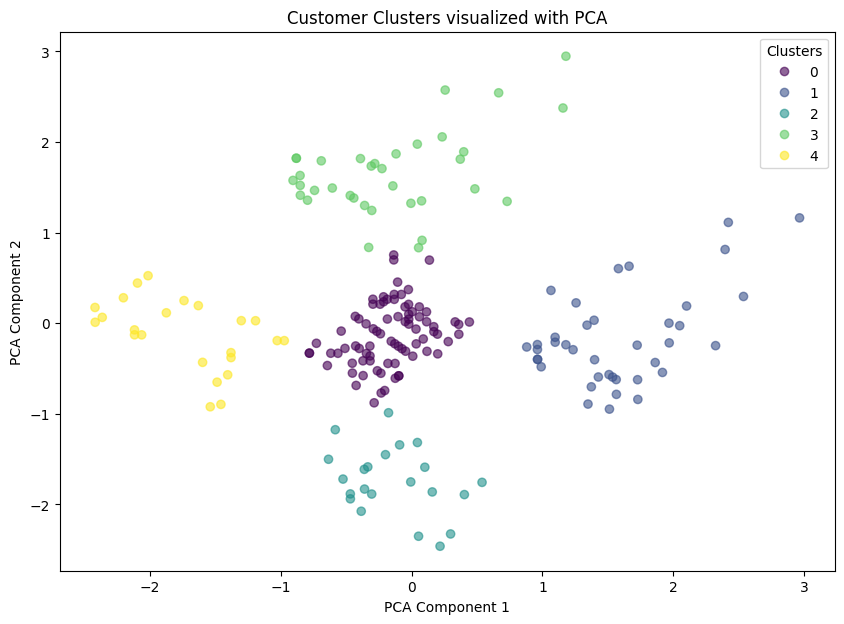

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate PCA
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters visualized with PCA')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

## Propose marketing strategies

### Subtask:
Suggest relevant marketing strategies for each identified segment.


**Reasoning**:
Analyze the characteristics of each cluster by grouping and aggregating the original 'Annual Income (k$)' and 'Spending Score (1-100)' columns.



In [13]:
cluster_summary = df.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_summary)

# Describe the typical profile of customers within each cluster and propose marketing strategies.
print("Cluster Profiles and Marketing Strategies:")
for index, row in cluster_summary.iterrows():
    print(f"\nCluster {index}:")
    income = row['Annual Income (k$)']
    spending = row['Spending Score (1-100)']

    if income < 40 and spending < 40:
        profile = "Low Income, Low Spending (Stingy)"
        strategy = "Focus on value deals, discounts, and essential items. Use cost-effective communication channels like flyers or SMS."
    elif income < 40 and spending > 60:
        profile = "Low Income, High Spending (Careful Spenders)"
        strategy = "Offer budget-friendly luxury items, loyalty programs, and installment plans. Target through social media with aspirational content."
    elif income > 60 and spending < 40:
        profile = "High Income, Low Spending (Miserly)"
        strategy = "Highlight quality, exclusivity, and long-term value. Use targeted advertising in upscale magazines or online platforms."
    elif income > 60 and spending > 60:
        profile = "High Income, High Spending (Spenders)"
        strategy = "Promote premium products, new arrivals, and exclusive events. Engage through personalized emails and high-end social media."
    else:
        profile = "Mid-Range Income and Spending (Average)"
        strategy = "Offer a mix of products and promotions. Use a balanced marketing approach across various channels, focusing on popular trends and seasonal offers."

    print(f"  Profile: {profile}")
    print(f"  Marketing Strategy: {strategy}")

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


Cluster Profiles and Marketing Strategies:

Cluster 0:
  Profile: Mid-Range Income and Spending (Average)
  Marketing Strategy: Offer a mix of products and promotions. Use a balanced marketing approach across various channels, focusing on popular trends and seasonal offers.

Cluster 1:
  Profile: High Income, High Spending (Spenders)
  Marketing Strategy: Promote premium products, new arrivals, and exclusive events. Engage through personalized emails and high-end social media.

Cluster 2:
  Profile: Low Income, High Spending (Careful Spenders)
  Marketing Strategy: Offer budget-friendly luxury items, loyalty programs, and installment plans. Target through social media with aspirational content.

Cluster 3:
  Profile: High Income, Low Spending (Miserly)
  Marketing Strategy: Highlight quality, exclusivity, and long-term value. Use targeted advertising in upscale magazines or online platforms.

Cluster 4:
  Profile: Low Income, Low Spending (Stingy)
  Marketing Strategy: Focus on value d

## Summary:

### Data Analysis Key Findings

*   The dataset contains 200 customer entries with `CustomerID`, `Genre`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`.
*   There are no missing values in the dataset.
*   Based on the elbow method, the optimal number of clusters for customer segmentation was determined to be 5.
*   K-Means clustering successfully segmented the customers into 5 distinct groups based on their Annual Income and Spending Score.
*   The five identified customer clusters have the following average characteristics:
    *   **Cluster 0 (Average):** Mid-range income (~55k) and mid-range spending (~50).
    *   **Cluster 1 (Spenders):** High income (~87k) and high spending (~82).
    *   **Cluster 2 (Careful Spenders):** Low income (~26k) and high spending (~79).
    *   **Cluster 3 (Miserly):** High income (~88k) and low spending (~17).
    *   **Cluster 4 (Stingy):** Low income (~26k) and low spending (~21).
*   PCA effectively reduced the dimensionality of the data to visualize the separation of these 5 clusters in a 2D plot.

### Insights or Next Steps

*   Develop specific marketing campaigns for each cluster, leveraging the identified profiles (e.g., loyalty programs for "Careful Spenders", exclusive offers for "Spenders").
*   Further analyze the demographic data (`Genre`, `Age`) within each cluster to refine the target audience and personalize marketing messages even further.
